<a href="https://colab.research.google.com/github/gideonkipkorir/Sentimental-Analysis-based-on-tweet-feeds/blob/master/Copy_of_Sentimental_Analysis_based_on_tweet_feeds_Power_Team_MasterFile_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:
Build a model that classifies tweets whether they are positive, negative or neutral sentiments.


# Metric of sucess
Build a model with above 80% accuracy that can classify tweets into negative, positive and neutral sentiments.

#Understanding the Context
Kenyan bankers wants to improve the interactions with their users on Twitter. Optimising on twitter interaction is important because  users can be, consumers, potential consumers,business parters or potential business parters. By classifying the tweets we can help the relevant department addressing emerging and pressing issues affecting the users


#Experimental Design
> 
1. Scraping for tweets from twitter
2. Basic clean( removing puctuations, username, hashtags, url links)
3. Labeling of tweets
4. Undertaking Exploratory data analysis
5. Build a baseline model.
6. Improve the model












#Data relevance

Data source: data was sourced from twitter

The relavance of our data will be answered by the following questions.

How accurate is the data?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

# From the ideation sheet(we use as a guide./scope)
- Modelling report detailing the modelling process. Algorithm choosen, Metric choosen etc plus correctly identify reasons for positive sentiments and negative sentiments. I.e top 3 reasons for positive/negative sentiment.

#Tweets mining

In [0]:
#Importing Libariries
import pandas as pd
import numpy as np

import json
import csv
import tweepy
import re


In [0]:
# pip install tweepy

In [0]:
consumer_key = "bFZAKkBqH1fxJukwjZB1hokwv"
consumer_secret = "Momkx7aCKDRqq37NjyrKWpiG31sviKUWvsQnZxAAlN8gmWU6ds"
access_token = "818900839901331456-kWZlALIJ5jS6AGEdiHKHRDXqMmDtikc"
access_token_secret = "Pfq0IrrRCke9zc5teAc4I72gyIqfcXVimLciGViPsUbaR"

In [0]:
import os
import tweepy as tw
import pandas as pd

In [0]:
#getting authorizations
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
#searching for tweets
# Define the search term and the date_since date as variables
search_words = "@National_Bank"
date_since = "2019-09-01"


In [0]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",tweet_mode="extended",
              since=date_since).items(10000)
tweets

In [0]:
# Collect tweets
# tweets = tw.Cursor(api.search,
#               q=search_words,
#               lang="en",
#               since=date_since).items(10000)

# # Iterate and print tweets
# for tweet in tweets:
#     print(tweet.text)

In [0]:
#To filterout retweets
new_search = search_words 
new_search

'@National_Bank'

In [0]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(10000)

# Iterate and print tweets
tweets_text = [[tweet.text, tweet.user.location,tweet.created_at] for tweet in tweets]
tweets_text


[["@National_Bank have been trying to call you guys I'm kept on hold for 2 whole minutes everytime I do so. So unsatisfying I must say.",
  'Mombasa',
  datetime.datetime(2020, 4, 15, 11, 53, 17)],
 ['RT @National_Bank: Wondering how to keep them busy and help them learn new skills? Our Vision account will also come in handy. Talk to us t…',
  '',
  datetime.datetime(2020, 4, 15, 6, 5, 39)],
 ['@National_Bank @Safaricom_Care Good morning,any hopes today?,',
  '',
  datetime.datetime(2020, 4, 15, 5, 15, 38)],
 ['@National_Bank kindly check your Dm\nThank you',
  'kericho,kenya',
  datetime.datetime(2020, 4, 14, 16, 49, 26)],
 ['RT @baDnewSanalysT: THOMAS "FRAUD-SAURUS" GACHIE::::AN ICT GURU WHO LOOTED THE DEFUNCT @NATIONAL_BANK TO ITS DEATH BED USING ICT TEKNIX THR…',
  'Everywhere In Kenya',
  datetime.datetime(2020, 4, 14, 16, 29, 33)],
 ['@Douglasorangi @National_Bank @KCBGroup Some banks are still using the 19th century banking techniques in this 21st… https://t.co/R0FzX5JPjk',
  'N

@NCBABankKenya
@ncbacare

In [0]:
tweets = pd.DataFrame(data=tweets_text, 
                    columns=['text', "location", 'Date'])
tweets.to_csv('National.csv')
tweets.shape


(56, 3)

In [0]:
#Absa
Absa = pd.read_csv('/content/Absa.csv')
Bank = []
a= np.arange(len(Absa))
for row in a:
  Bank.append('Absa Bank')
Absa['Bank'] = Bank
Absa.head()
#kcb
KCB = pd.read_csv('/content/KCB.csv')
kcb = []
b = np.arange(len(KCB))
for row in b:
  kcb.append('KCB Bank')
KCB['Bank'] = kcb

# #Ncba
cba= pd.read_csv('/content/CBA.csv')
ca= pd.read_csv('/content/cA.csv')
Ncba = pd.concat([cba, ca], axis = 0).reset_index()
cb = []
b = np.arange(len(Ncba))
for row in b:
  cb.append('NCBA Bank')
Ncba['Bank'] = cb
# #i&m bank
im= pd.read_csv('/content/I&M.csv')
bank = []
b = np.arange(len(im))
for row in b:
  bank.append('I&M Bank')
im['Bank'] = bank
#Stanbic bank
stb= pd.read_csv('/content/Stanbic.csv')
bank = []
b = np.arange(len(stb))
for row in b:
  bank.append('Stanbic Bank')
stb['Bank'] = bank
#Coop bank
Coop= pd.read_csv('/content/Coop.csv')
bank = []
b = np.arange(len(Coop))
for row in b:
  bank.append('Co_operative Bank')
Coop['Bank'] = bank
#Stanchart bank
Stanchart= pd.read_csv('/content/Stanchart.csv')
bank = []
b = np.arange(len(Stanchart))
for row in b:
  bank.append('Stanchart Bank')
Stanchart['Bank'] = bank
#National
na= pd.read_csv('/content/Stanchart.csv')
bank = []
b = np.arange(len(na))
for row in b:
  bank.append('National Bank')
na['Bank'] = bank
#equity
Equity= pd.read_csv('/content/Equity.csv')
bank = []
b = np.arange(len(Equity))
for row in b:
  bank.append('Equity Bank')
Equity['Bank'] = bank

In [0]:
bk_tweets = pd.concat([stb, im, Ncba, KCB, Equity, Absa, Coop, Stanchart,na],axis =0).reset_index()
bk_tweets.head()
bk_tweets.to_csv('Bks_tweets.csv')


In [0]:

tweets_text = pd.read_csv('/content/Bks_tweets.csv', index_col = 0)
tweets_text.isnull().sum()

level_0            0
Unnamed: 0.1       0
text               0
location        1925
Date               0
Bank               0
index           6618
dtype: int64

In [0]:
tweets_text.shape

(7571, 7)

In [0]:
tweets_text =tweets_text.drop(columns = ['location','index'])
tweets_text.text[3]

'RT @RichFrontiers: Banking Stocks in 2020 (YTD)\n@StanChartKE -8.77%\n@imbankke -9.35%\n@StanbicKE -12.36%\n@DTBKenya -19.50%\n@BankofKigali -20…'

#cleaning

In [0]:
#preprocessing
tweets_text['text'] = tweets_text['text'].str.replace('@[A-Za-z0–9]+', ' ')#removing @user
tweets_text['text'] = tweets_text['text'].str.replace('#[A-Za-z0–9]+', ' ')#removing hashtags
tweets_text['text'] = tweets_text['text'].str.replace('<[^>]+>', ' ' )
tweets_text['text'] = tweets_text['text'].str.replace("\s+[a-zA-Z]\s+", ' ')
tweets_text['text'] = tweets_text['text'].str.replace('[^a-zA-Z]', ' ')#removing numbers

tweets_text['text'] = tweets_text['text'].str.replace('\'\w+', ' ') #removing such puntuctions
tweets_text['text'] = tweets_text['text'].str.replace('https?://\S+|www\.\S+', '')#removing url links
tweets_text['text'] = tweets_text['text'].str.replace('rt', ' ')
tweets_text['text'] = tweets_text['text'].str.replace('kcbgroup', ' ')

tweets_text['text'] = tweets_text['text'].str.replace('ref  no', ' ')
tweets_text['text'] = tweets_text['text'].str.replace('kindly', ' ')
tweets_text['text'] = tweets_text['text'].str.replace('aren t','are not')
tweets_text['text'] = tweets_text['text'].str.replace('can t','can not')
tweets_text['text'] = tweets_text['text'].str.replace('don ','do not')
tweets_text['text'] = tweets_text['text'].str.replace('isnt','is not')
#  Converting all characters in the message to lower case
tweets_text['text'] = tweets_text['text'].map(lambda x: x.lower())
tweets_text = tweets_text.drop_duplicates()# removing duplicates
# tweet_text['text'] = tweet_text['text'].str.replace('KCB-\[0-9]\[a-zA-Z0-9]', ' ')



In [0]:
tweets_text.sample(5)

,level_0,Unnamed: 0.1,text,Date,Bank
3593,2392,2392,have written to you via dm,2020-03-31 14:53:26,KCB Bank
5333,1436,1436,thank you,2020-03-31 15:23:53,Equity Bank
5146,1249,1249,this social distancing in banking halls is jus...,2020-04-01 11:33:42,Equity Bank
7190,311,311,if do nott have an app still use the old met...,2020-03-31 16:25:04,Stanchart Bank
6539,669,669,agha khan walk branch has the worse service ...,2020-04-02 10:22:38,Co_operative Bank


In [0]:
tweets_text.to_csv('cleaned_tweets.csv')
tweets_text.shape

(7571, 5)

In [0]:
tweets = pd.read_csv('/content/cleaned_tweets.csv', index_col = 0, parse_dates=['Date'])
tweets = tweets.drop(columns = (['Unnamed: 0.1','level_0']), axis = 1)
tweets.head()

,text,Date,Bank
0,is this twitter account of yours functional ...,2020-04-07 07:22:58,Stanbic Bank
1,rt banking stocks in ytd ...,2020-04-07 07:06:59,Stanbic Bank
2,rt banking stocks in ytd ...,2020-04-07 06:56:13,Stanbic Bank
3,rt banking stocks in ytd ...,2020-04-07 06:51:00,Stanbic Bank
4,rt banking stocks in ytd ...,2020-04-07 06:50:45,Stanbic Bank


In [0]:
tweets['text'] = tweets['text'].str.replace('https co', ' ')
tweets['text'] = tweets['text'].str.replace('isn', 'is not')
tweets['text'] = tweets['text'].str.replace('https co', ' ')
tweets['text'] = tweets['text'].str.replace('https', ' ')
tweets['text'] = tweets['text'].str.replace('nott', 'not ')
# tweets['text'] = tweets['text'].str.replace('dm', ' ')
# tweets['text'] = tweets['text'].str.replace('check', ' ')

In [0]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7571 entries, 0 to 7570
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   text    7571 non-null   object        
 1   Date    7571 non-null   datetime64[ns]
 2   Bank    7571 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 236.6+ KB


In [0]:
tweets['text'] = tweets['text'].astype(str)

In [0]:
tweets.nunique()


text    4835
Date    6067
Bank       9
dtype: int64

In [0]:
tweets= tweets.drop_duplicates(['text'])[['Date','Bank','text' ]].reset_index()

In [0]:
tweets.head()

,index,Date,Bank,text
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...
1,1,2020-04-07 07:06:59,Stanbic Bank,rt banking stocks in ytd ...
2,9,2020-04-07 06:42:47,Stanbic Bank,banking stocks in ytd ...
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my dm
4,11,2020-04-07 05:21:54,Stanbic Bank,rt it s in moments like these when we need ...


In [0]:
tweets.nunique()

index    4835
Date     4809
Bank        8
text     4835
dtype: int64

In [0]:
tweets.shape

(4835, 4)

#Post tagging

##TextBlob

In [0]:
import nltk
from textblob import TextBlob

In [0]:
#example, Using textBlox to get text polarity
text = "i do not hate you"
print(text)
print(TextBlob(text).sentiment.polarity)

i do not hate you
0.4


not bad , it is above 0 so it would be classified as positive which is pretty acurate

In [0]:
tweets['sentiment_textblob'] = tweets['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [0]:
# tweet_text.sample(9)
tweets.sample(4)


,index,Date,Bank,text,sentiment_textblob
4681,7011,2020-04-03 17:36:55,Stanchart Bank,will be forced to walk into one of your bran...,-0.133333
1921,3089,2020-04-01 18:43:04,KCB Bank,i ve been having issues with my card payment a...,0.000000
274,357,2020-04-07 07:07:59,NCBA Bank,banks should be at the forefront of this ...,-0.076923
1192,2217,2020-04-04 13:19:32,KCB Bank,hi check dm and reply,0.000000


In [0]:
tweets['text'][6]

'  am great full to offer kenyans this great oppo unity to showcase their products on the only  made in af      t co mukzfsr zb'

In [0]:
a = np.arange(11)
for i in a:
  print(tweets['text'][i])
  i += 1

  is this twitter account of yours functional  you do not  reply to dm nor tweets
rt    banking stocks in       ytd                                              
banking stocks in       ytd                                             t co pttkw h wv
  reply to my dm
rt    it s in moments like these when we need to look out for silver lining  what are you grateful for today  share with us in t 
  was this loan repayment break hoax or just public show off   
  am great full to offer kenyans this great oppo unity to showcase their products on the only  made in af      t co mukzfsr zb
  can you answer my dm   am kind of disappointed with customercare    it automated care   losing touch with working class
    advise on how long it takes your bank to resolve customer queries because made mine over mont      t co ft lturylq
    provide the following details for your garden city branch      local routing number   swift code    address thank you
rt       new expo  orders index           t co so

In [0]:
txt = tweets['text'][3]
obj = TextBlob(txt)
txt

'  reply to my dm'

In [0]:
sentiment = []
sentiment.append(obj.sentiment.polarity)
print(sentiment)

[0.0]


## Sentiment Scoring with Vader

the above score would have been classified as positive yet in the real sense it is a negative sentiment. so lets have tried vadersentiment

In [0]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 2.5MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser= SentimentIntensityAnalyzer()

In [0]:
print(tweets['text'][3])
print('polarity score:', analyser.polarity_scores(tweets['text'][3])['compound'])

  reply to my dm
polarity score: 0.0


a negative score makes it a negative sentiment which is pretty accurate according to the above sentence

In [0]:
tweets['sentiment_vader'] = tweets['text'].apply(lambda tweet: analyser.polarity_scores(tweet)['compound'])

In [0]:
tweets.head()


,index,Date,Bank,text,sentiment_textblob,sentiment_vader
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...,0.0,0.0000
1,1,2020-04-07 07:06:59,Stanbic Bank,rt banking stocks in ytd ...,0.0,0.0000
2,9,2020-04-07 06:42:47,Stanbic Bank,banking stocks in ytd ...,0.0,0.0000
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my dm,0.0,0.0000
4,11,2020-04-07 05:21:54,Stanbic Bank,rt it s in moments like these when we need ...,0.0,0.7717


In [0]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               4835 non-null   int64         
 1   Date                4835 non-null   datetime64[ns]
 2   Bank                4835 non-null   object        
 3   text                4835 non-null   object        
 4   sentiment_textblob  4835 non-null   float64       
 5   sentiment_vader     4835 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 226.8+ KB


In [0]:
# print(tweets['text'][1000])
print(analyser.polarity_scores(tweets['text'][2272])['compound'])

0.0


In [0]:
tweets['text'][2272]

'  how long will it take'

In [0]:
#To read the first 10 tweets in full length
import numpy as np
a = np.arange(10)
for i in a:
  print(tweets['text'][i])
  i += 1

  is this twitter account of yours functional  you do not  reply to dm nor tweets
rt    banking stocks in       ytd                                              
banking stocks in       ytd                                             t co pttkw h wv
  reply to my dm
rt    it s in moments like these when we need to look out for silver lining  what are you grateful for today  share with us in t 
  was this loan repayment break hoax or just public show off   
  am great full to offer kenyans this great oppo unity to showcase their products on the only  made in af      t co mukzfsr zb
  can you answer my dm   am kind of disappointed with customercare    it automated care   losing touch with working class
    advise on how long it takes your bank to resolve customer queries because made mine over mont      t co ft lturylq
    provide the following details for your garden city branch      local routing number   swift code    address thank you


In [0]:
tweets.nunique()

index                 4835
Date                  4809
Bank                     8
text                  4835
sentiment_textblob     292
sentiment_vader        456
dtype: int64

In [0]:
print(tweets.isnull().sum())

index                 0
Date                  0
Bank                  0
text                  0
sentiment_textblob    0
sentiment_vader       0
dtype: int64


In [0]:
tweets['sentiment_textblob'] = tweets['sentiment_textblob'].astype(int)

In [0]:
tweets.shape

(4835, 6)

# compound score metric
* positive sentiment: compound score > 0.05 > 
* Neutral sentiment : compound score < 0.05< & >=-0.05 
* negative score: compound score < 0.05 

In [0]:
# def sentiment_generator():
tweet_sentiment = []
for score in tweets['sentiment_vader']:
  if score > 0.05:
    tweet_sentiment.append('positive')
  elif score < 0.05 and score >= -0.05:
    tweet_sentiment.append('neutral')
  elif score < -0.05:
    tweet_sentiment.append('negative')
  else:
      tweet_sentiment.append(np.nan)
 

In [0]:
tweets.shape

(4835, 6)

In [0]:
# sentiment_generator()
tweets['tweet_sentiment'] = tweet_sentiment

In [0]:
tweets.head()

,index,Date,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...,0,0.0000,neutral
1,1,2020-04-07 07:06:59,Stanbic Bank,rt banking stocks in ytd ...,0,0.0000,neutral
2,9,2020-04-07 06:42:47,Stanbic Bank,banking stocks in ytd ...,0,0.0000,neutral
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my dm,0,0.0000,neutral
4,11,2020-04-07 05:21:54,Stanbic Bank,rt it s in moments like these when we need ...,0,0.7717,positive


In [0]:
tweets = tweets.dropna()
tweets.isnull().sum()

index                 0
Date                  0
Bank                  0
text                  0
sentiment_textblob    0
sentiment_vader       0
tweet_sentiment       0
dtype: int64

In [0]:
#Making a comparison between textBlob and Vader in sentiment scoring
dm = tweets[tweets['sentiment_vader'] <= -0.05]
dm.sample(20)


,index,Date,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment
3919,6009,2020-04-06 12:06:17,Co_operative Bank,not when you re frustrating my retail online...,0,-0.4404,negative
3803,5845,2020-03-30 14:54:32,Absa Bank,these are unwarranted delays and very unfair...,0,-0.5256,negative
4535,6800,2020-03-31 07:45:00,Co_operative Bank,rt need to order something online use your...,0,-0.3818,negative
4643,6956,2020-04-05 05:46:19,Stanchart Bank,my mobile banking access was blocked because...,0,-0.2263,negative
3547,5498,2020-03-30 11:58:52,Equity Bank,aduke am stuck can be assisted check dm,0,-0.2500,negative
4035,6211,2020-04-06 07:18:41,Co_operative Bank,rt ke bravo bravo after offering this inc...,0,-0.5719,negative
3251,5146,2020-04-01 11:33:42,Equity Bank,this social distancing in banking halls is jus...,0,-0.6808,negative
4522,6784,2020-03-31 10:24:16,Co_operative Bank,why do keep ignoring my calls promised to r...,0,-0.0516,negative
3312,5216,2020-04-01 08:13:53,Equity Bank,idk who needs to hear this but will seal d...,0,-0.0516,negative
656,1108,2020-04-02 05:25:48,NCBA Bank,what s the correct mpesa paybill no to depos...,0,-0.2960,negative


Surprisingly it recognizes some swahili words

In [0]:
print(tweets.text[3644])

hey   but you told me you do not  offer gold etf      t co  vnkmblvbx


In [0]:
tweets.to_csv('bank_tweets.csv')

## Modelling 

In [0]:
!nvidia-smi #checking properties of the allocated gpu

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
!pip install gdown
!pip install tensorflow_text

     |████████████████████████████████| 8.3MB 2.6MB/s 
     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 3.9MB 39.3MB/s 
     |████████████████████████████████| 450kB 43.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b869fc0c7a7b5da5fe28db0508c2766f01f1790a6b76bebaee9cd23009fad06e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 39kB/s 


In [0]:
!pip install wordcloud

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# register_matplotlib_converters()
# sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

# sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

# rcParams['figure.figsize'] = 12, 8

# RANDOM_SEED = 42

# np.random.seed(RANDOM_SEED)
# tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
bank_twts = pd.read_csv('/content/bank_tweets.csv', index_col = 0, parse_dates=['Date'])
bank_twts.head()

,index,Date,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...,0,0.0000,neutral
1,1,2020-04-07 07:06:59,Stanbic Bank,rt banking stocks in ytd ...,0,0.0000,neutral
2,9,2020-04-07 06:42:47,Stanbic Bank,banking stocks in ytd ...,0,0.0000,neutral
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my dm,0,0.0000,neutral
4,11,2020-04-07 05:21:54,Stanbic Bank,rt it s in moments like these when we need ...,0,0.7717,positive


#Data understanding

In [0]:
#data types
bank_twts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4834 entries, 0 to 4834
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               4834 non-null   int64         
 1   Date                4834 non-null   datetime64[ns]
 2   Bank                4834 non-null   object        
 3   text                4834 non-null   object        
 4   sentiment_textblob  4834 non-null   int64         
 5   sentiment_vader     4834 non-null   float64       
 6   tweet_sentiment     4834 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 302.1+ KB


In [0]:
bank_twts.isnull().sum()

index                 0
Date                  0
Bank                  0
text                  0
sentiment_textblob    0
sentiment_vader       0
tweet_sentiment       0
dtype: int64

In [0]:
#Checking for duplicates
print('No of Duplicates values:', bank_twts.duplicated().sum())
print('**************************************************')
#Unique values
print('Unique values')
print(bank_twts.nunique())

No of Duplicates values: 0
**************************************************
Unique values
index                 4834
Date                  4808
Bank                     8
text                  4834
sentiment_textblob       3
sentiment_vader        455
tweet_sentiment          3
dtype: int64


In [0]:
bank_twts.columns

Index(['index', 'Date', 'Bank', 'text', 'sentiment_textblob',
       'sentiment_vader', 'tweet_sentiment'],
      dtype='object')

#Feature engineering

In [0]:
bank_twts = bank_twts.set_index('Date')


In [0]:
bank_twts['year'] = bank_twts.index.year
bank_twts['month'] = bank_twts.index.month
bank_twts['weekday_name'] = bank_twts.index.day_name()
bank_twts['year quarters'] = bank_twts.index.quarter

In [0]:
#droping index column
tweets = bank_twts
tweets.head()

,index,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment,year,month,weekday_name,year quarters
Date,,,,,,,,,,
2020-04-07 07:22:58,0,Stanbic Bank,is this twitter account of yours functional ...,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 07:06:59,1,Stanbic Bank,rt banking stocks in ytd ...,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 06:42:47,9,Stanbic Bank,banking stocks in ytd ...,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 06:38:08,10,Stanbic Bank,reply to my dm,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 05:21:54,11,Stanbic Bank,rt it s in moments like these when we need ...,0,0.7717,positive,2020,4,Tuesday,2


#Expolatory Data Analysis

## Univariate Analysis

In [0]:
#descriptive statistics
cat_df = bank_twts[['Bank', 'text', 'tweet_sentiment','weekday_name' ]]
cat_df.describe()

,Bank,text,tweet_sentiment,weekday_name
count,4834,4834,4834,4834
unique,8,4834,3,7
top,KCB Bank,my yr old uncle spent all his pen...,neutral,Monday
freq,1830,1,1936,944


* Kcb has the most tweets
* Most tweets are posted on monday
* Most tweets are neutral

In [0]:
 num_df =bank_twts[['year',	'month',	'year', 'year quarters']]
 num_df.describe()

,year,month,year,year quarters
count,4834.0,4834.000000,4834.0,4834.000000
mean,2020.0,3.825403,2020.0,1.825403
std,0.0,0.379661,0.0,0.379661
min,2020.0,3.000000,2020.0,1.000000
25%,2020.0,4.000000,2020.0,2.000000
50%,2020.0,4.000000,2020.0,2.000000
75%,2020.0,4.000000,2020.0,2.000000
max,2020.0,4.000000,2020.0,2.000000


* Most tweets are from the year 2020
* April has the highest number of tweets
* The second quarter of the year had the higest number of tweets

In [0]:
# #Label encoding categorical data
# print(cat_df.columns)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# cat_df[['tweet_sentiment', 'weekday_name']]= cat_df[['tweet_sentiment', 'weekday_name']].apply(le.fit_transform)

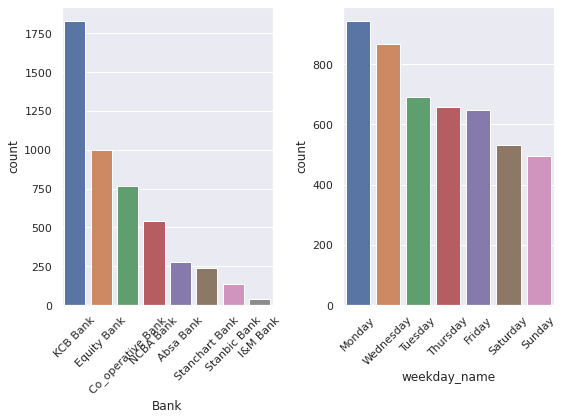

In [0]:
fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(8,6))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
ax= sns.countplot(x="Bank", data=cat_df, order=cat_df.Bank.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.countplot(x="weekday_name", data=cat_df, order=cat_df.weekday_name.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show();
fig.savefig('twst&weekdays.png')

* KCB had the most tweets
* I&M  had the least tweets

* Banks receive most tweets on monday and Wednesday
* Banks receives least tweets during weekends(Saturday and Sunday)

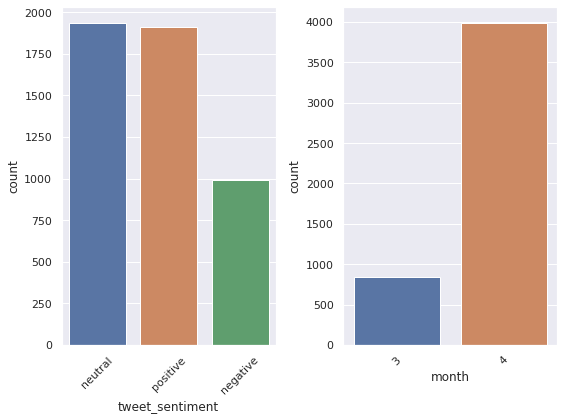

In [0]:

fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(8,6))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
ax= sns.countplot(x='tweet_sentiment', data=tweets)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.countplot(x='month', data = tweets)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show();
fig.savefig('twst&periods.png')

In [0]:
# fig, axs = plt.subplots(nrows=1, ncols=2, sharex='col', figsize = (12,10))
# sns.set(style="darkgrid")
# plt.subplot(1,2,1)
# ax= sns.countplot(x="tweet_sentiment", data=tweets, order=tweets.Bank.value_counts().index)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.subplot(1,2,2)
# ax = sns.countplot(x="month", data=tweets, order=tweets.tweet_sentiment.value_counts().index)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.tight_layout()
# plt.show();

* Second quarter has more tweets than the first quarter

## Bivariate Analysis

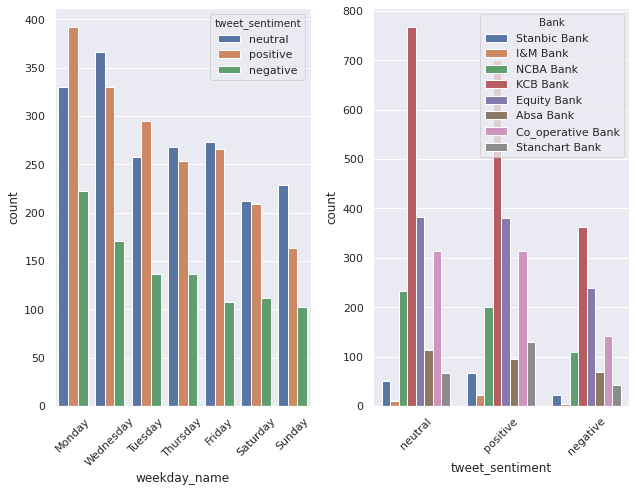

<Figure size 432x288 with 0 Axes>

In [0]:
fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(9,7))
plt.subplot(1,2,1)
ax = sns.countplot(x="weekday_name", hue = 'tweet_sentiment',data=cat_df, order=cat_df.weekday_name.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.countplot(x="tweet_sentiment", hue = 'Bank',data=tweets, order=tweets.tweet_sentiment.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show()
plt.savefig('senti')

#Multivariate Analysis

In [0]:
# twts = tweets
# # Get categorical data
# cat_data = tweets.select_dtypes(include = 'object')
# print('columns:',cat_data.columns)
#  #Label encoding categorical data
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# twts= bank_twts[['Bank', 'text', 'tweet_sentiment', 'weekday_name']].apply(le.fit_transform)[['year',	'month',	'year', 'year quarters']]
# twts = twts.drop(['index'],axis =1)
# #correlation analysis
# sns.heatmap(twts.corr(), annot = True)

###conclusion

Found no correlations among the features

In [0]:
#understanding each reveiw
post_senti = tweets[tweets['tweet_sentiment']=='positive']#Subsetting positive sentiments
print('positive steiments:',post_senti.shape)
neg_senti = tweets[tweets['tweet_sentiment']== 'negative']#Subsetting negative sentiments
print('negative sentiments:', neg_senti.shape)
neu_senti = tweets[tweets['tweet_sentiment']== 'neutral']#Subsetting neutral sentiments
print('neutral sentiments:',neu_senti.shape)

positive steiments: (1909, 10)
negative sentiments: (989, 10)
neutral sentiments: (1936, 10)


In [0]:
post_senti.sample()

,index,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment,year,month,weekday_name,year quarters
Date,,,,,,,,,,
2020-04-06 11:56:58,6019,Co_operative Bank,rt and the devki family for the huge sacrif...,0,0.6124,positive,2020,4,Monday,2


In [0]:
#balancing the data
p_tweets = post_senti.sample(len(neg_senti))
n_tweets = neu_senti.sample(len(neg_senti))
balanced_tweets = pd.concat([p_tweets, n_tweets, neg_senti], axis= 0).reset_index()
balanced_tweets.shape

(2967, 11)

We might need tom balance our data, neutral tweets are less by half compared to postive sentiments

In [0]:
post_senti  = " ".join(post_senti.text.to_numpy().tolist())
neg_senti  = " ".join(neg_senti.text.to_numpy().tolist())
neu_senti  = " ".join(neu_senti.text.to_numpy().tolist())

In [0]:
post_senti_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(post_senti)
neg_senti_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neg_senti)
neu_senti_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neu_senti)

In [0]:
def show_word_cloud(cloud, title):
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

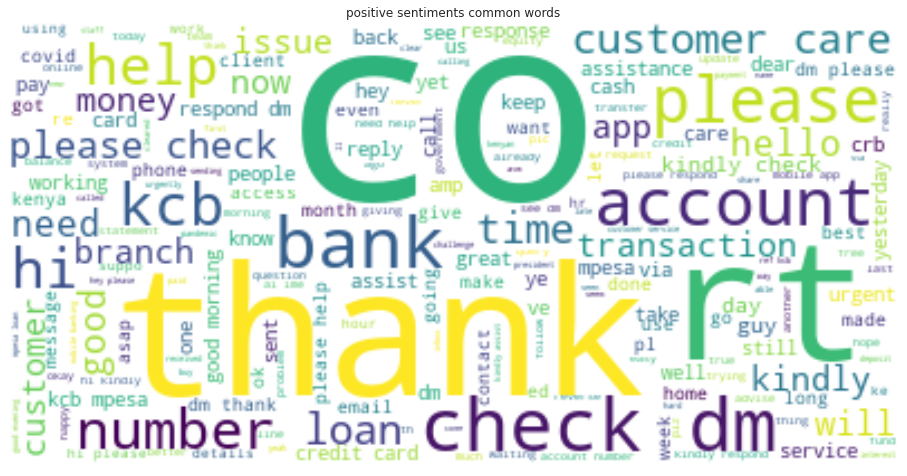

In [0]:
show_word_cloud(post_senti_cloud, "positive sentiments common words")

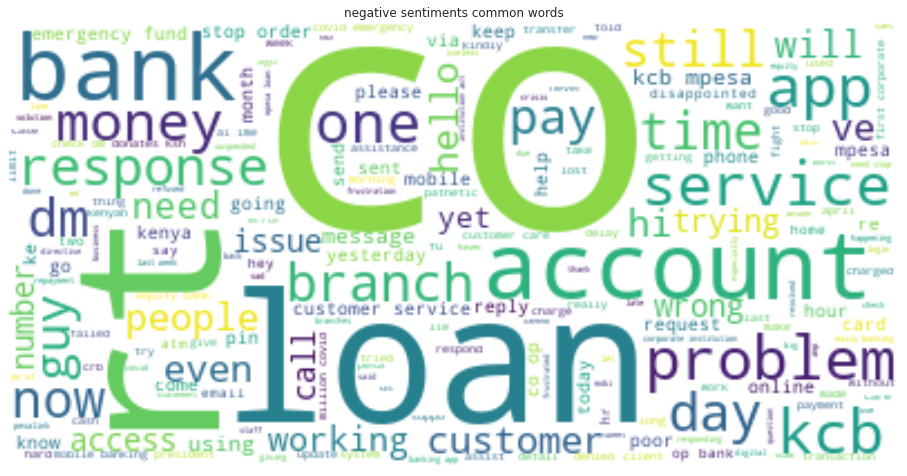

In [0]:
plt.figure(figsize = (16,10))
plt.imshow(neg_senti_cloud, interpolation = 'bilinear')
plt.title('negative sentiments common words')
plt.axis('off')
plt.show();

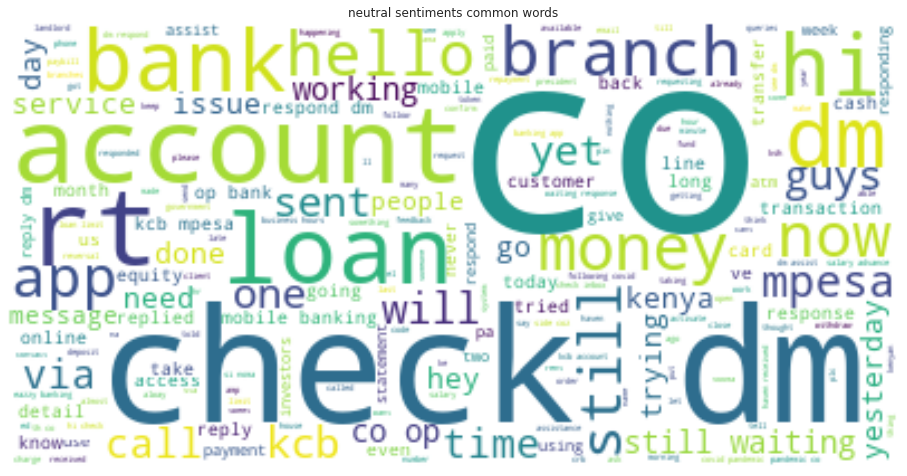

In [0]:
plt.figure(figsize = (16,10))

plt.imshow(neu_senti_cloud, interpolation = 'bilinear')
plt.title('neutral sentiments common words')
plt.axis('off')
plt.show()

##Comparison of Common negative words for two Banks

In [0]:
neg_t  = tweets[tweets['tweet_sentiment']=='negative']
neg_kcb = neg_t[neg_t['Bank']=='KCB Bank']#Subsetting Tweets for KCb
neg_im = neg_t[neg_t['Bank']== 'I&M Bank']#Subsetting Tweets for i&m
#Converting words into list of numbers
neg_kcb  = " ".join(neg_kcb.text.to_numpy().tolist())
neg_im = " ".join(neg_im.text.to_numpy().tolist())
#Removing stop words and putting them into word cloud
neg_kcb_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neg_kcb)
neg_im_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neg_im)

##KCB and I& M comparison of negatrive tweets on wordcloud

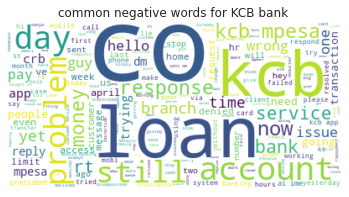

In [0]:
# fig = plt.subplots(nrows=1, ncols=2, sharex='col', figsize = (10,8))
#K
# plt.subplot(1, 2,1)
plt.imshow(neg_kcb_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('common negative words for KCB bank ')
plt.show();

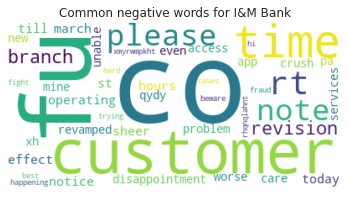

In [0]:
#I&M bank
# plt.subplot(1,2,1)
# plt.fig = plt.subplots(nrows = 1, ncols = 2, figsize= (8,6))
# plt.subplot(1,2,1)
plt.imshow(neg_im_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Common negative words for I&M Bank')
plt.show();

### KCB Bank

for KCB, Items that get reported frequently include,
* KCB Mpesa and mobile application services 
* Brach services
* Loan/Mpesa account problems
* Time taken in responding to their direct messages(Dm)

### I&M Bank

Negative tweets are about
* Customer services
* Branch services
* App(believed to be mobile application)

#Comparison of positive tweets between KCB and I&M banks

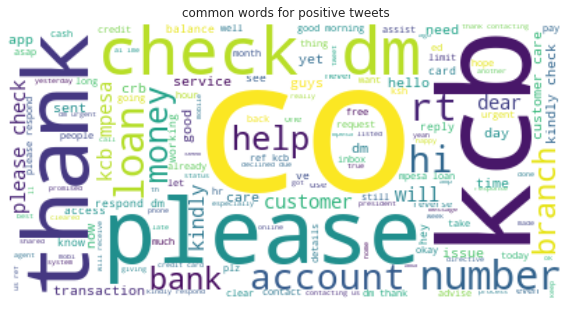

In [0]:
ve = tweets[tweets.tweet_sentiment=='positive']
post_kcb = ve[ve['Bank']=='KCB Bank']#Subsetting Tweets for KCb
post_im = ve[ve['Bank']== 'I&M Bank']#Subsetting Tweets for i&m
#Converting words into list of numbers
post_kcb  = " ".join(post_kcb.text.to_numpy().tolist())
post_im = " ".join(post_im.text.to_numpy().tolist())
#Removing stop words and putting them into word cloud
post_kcb_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(post_kcb)
post_im_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(post_im)
#Visiualizing common words, KCB
plt.figure(figsize = (10,8))
plt.imshow(post_kcb_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('common words for positive tweets')
plt.show()

common positive tweets for I&M Bank

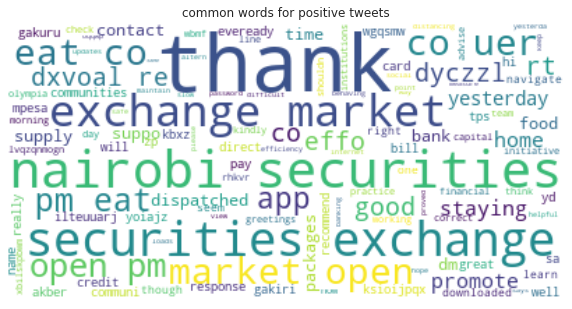

In [0]:
#Visiualizing common words, I&M Bank
plt.figure(figsize = (10,8))
plt.imshow(post_im_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('common words for positive tweets')
plt.show();

#Universal sentence encoder
encoding sentences using the universal sentence encoder

In [0]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [0]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(sparse=False).fit_transform(
  balanced_tweets.tweet_sentiment.to_numpy().reshape(-1, 1)
)

In [0]:
#Spliting the dataset into train and test datasets
x_train, x_test, y_train,y_test = train_test_split(balanced_tweets['text'], y, test_size = 0.1, random_state =45)

In [0]:
#sentence encoding x_train tweets
X_train = []
for tweets in tqdm(x_train):
  emb = use(tweets)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

100%|██████████| 2670/2670 [02:26<00:00, 18.25it/s]


In [0]:
#sentence encoding x_test tweets
X_test = []
for r in tqdm(x_test):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 297/297 [00:16<00:00, 18.31it/s]


In [0]:
print(X_train.shape, y_train.shape)

(2632, 512) (2632, 3)


In [0]:
print(X_test.shape, y_test.shape)


(293, 512) (293, 3)


#Training with neural networks

In [0]:
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.75
)
)
model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.7)
)

model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [0]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.2, 
    verbose=1, 
    shuffle=True
)

Train on 2105 samples, validate on 527 samples
Epoch 1/10
2105/2105 [==============================] - 1s 450us/sample - loss: 1.0748 - accuracy: 0.3981 - val_loss: 0.9962 - val_accuracy: 0.5863
Epoch 2/10
2105/2105 [==============================] - 0s 222us/sample - loss: 0.9527 - accuracy: 0.5306 - val_loss: 0.8349 - val_accuracy: 0.6452
Epoch 3/10
2105/2105 [==============================] - 0s 222us/sample - loss: 0.8515 - accuracy: 0.6048 - val_loss: 0.7505 - val_accuracy: 0.6907
Epoch 4/10
2105/2105 [==============================] - 1s 252us/sample - loss: 0.7879 - accuracy: 0.6542 - val_loss: 0.6882 - val_accuracy: 0.7002
Epoch 5/10
2105/2105 [==============================] - 0s 232us/sample - loss: 0.7461 - accuracy: 0.6836 - val_loss: 0.6717 - val_accuracy: 0.7097
Epoch 6/10
2105/2105 [==============================] - 0s 226us/sample - loss: 0.6923 - accuracy: 0.7036 - val_loss: 0.6520 - val_accuracy: 0.7154
Epoch 7/10
2105/2105 [==============================] - 0s 230us/

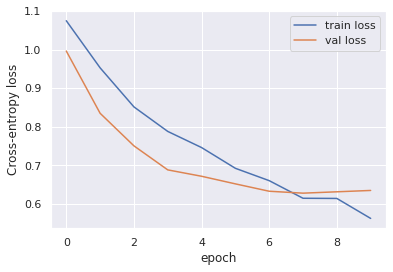

In [0]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

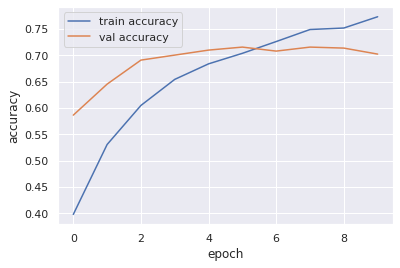

In [0]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [0]:
model.evaluate(X_test, y_test)

293/293 [==============================] - 0s 73us/sample - loss: 0.6104 - accuracy: 0.7372


[0.6103826395073848, 0.7372014]

## Challenging the Model

In [0]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix, precision_score

In [0]:
def model_info_validation(classifier, data_X, data_Y, name):
    # validate set
    print("****validate_set****")
    print("Model is <<"+name+">>")
    data_Y_pred = classifier.predict(data_X)
    print("accuracy:",accuracy_score(data_Y, data_Y_pred))
    print("f1 score:", f1_score(data_Y,data_Y_pred, average = "macro")) # unweighted mean,i.e. does not take label imbalance in account
    print("recall:", recall_score(data_Y,data_Y_pred, average= "macro"))
    print("precision:", precision_score(data_Y, data_Y_pred, average = "macro"))

## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rdt_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',
                                   n_jobs = -1, random_state = 32)
rdt_classifier.fit(X_train,y_train)

In [0]:
model_info_validation(dt_classifier, X_test, y_test, 'Decision Tree Classification')

## Decision Tree Classification

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state  = 32)
dt_classifier.fit(X_train,y_train)

In [0]:
model_info_validation(dt_classifier, X_test, y_test, 'Decision Tree Classification')

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier_naive_bayes = MultinomialNB(fit_prior = False)
classifier_naive_bayes.fit(X_train,y_train)

#Conclusion

1.   Customers experience problems with their mobile application 
2. customers face challenges on bank/mpesa and loan related services 
3. customers complain about getting response to their direct messages(dm)
4. Customers sometimes face problems with their branches
5. Most customers run to the customer care for help.



# Recommendations

*   Improve customer care services
*   use additinal tools such as chatbots to respond and record customers' complain/feedback
* Countinously improve user interface for their mobile applications
* Create user-self-help systems that provide quick fix for common recurring problems that can be help customers unblock themselves
* Build intent recognition systems to channel customers' feedback to the relevant departments



In [0]:
!pip install transformers

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
balanced_tweets.tweet_sentiment = le.fit_transform(balanced_tweets.tweet_sentiment)

In [0]:
sentences = balanced_tweets.text.values
labels = balanced_tweets.tweet_sentiment

In [0]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [0]:
#Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)


##Padding & Truncating

Pad and truncate our sequences so that they all have the same length, MAX_LEN.

First, what's the maximum sentence length in our dataset?

In [0]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Given that, let's choose MAX_LEN = 64 and apply the padding.

In [0]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 43...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')

##Attention Masks

The attention mask simply makes it explicit which tokens are actual words versus which are padding.

The BERT vocabulary does not use the ID 0, so if a token ID is 0, then it's padding, and otherwise it's a real token.

In [0]:
 #Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

##Training & Validation Split

In [0]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)